In [1]:
# import os
# import json
# import numpy as np
# import networkx as nx
# import matplotlib as mpl
# import scipy.stats as sst

In [2]:
%reload_ext autoreload
%autoreload 2
import sys
sys.path.insert(0, '../scripts/')
import plottingUtils as plu

import json
import numpy as np
import pandas as pd
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#mpl.rc('text',usetex=False)
dpi=100
basefigdir = '/home/sidreed/thesis_SidReed/writing/nontext/figures'
pal = sns.color_palette("coolwarm")

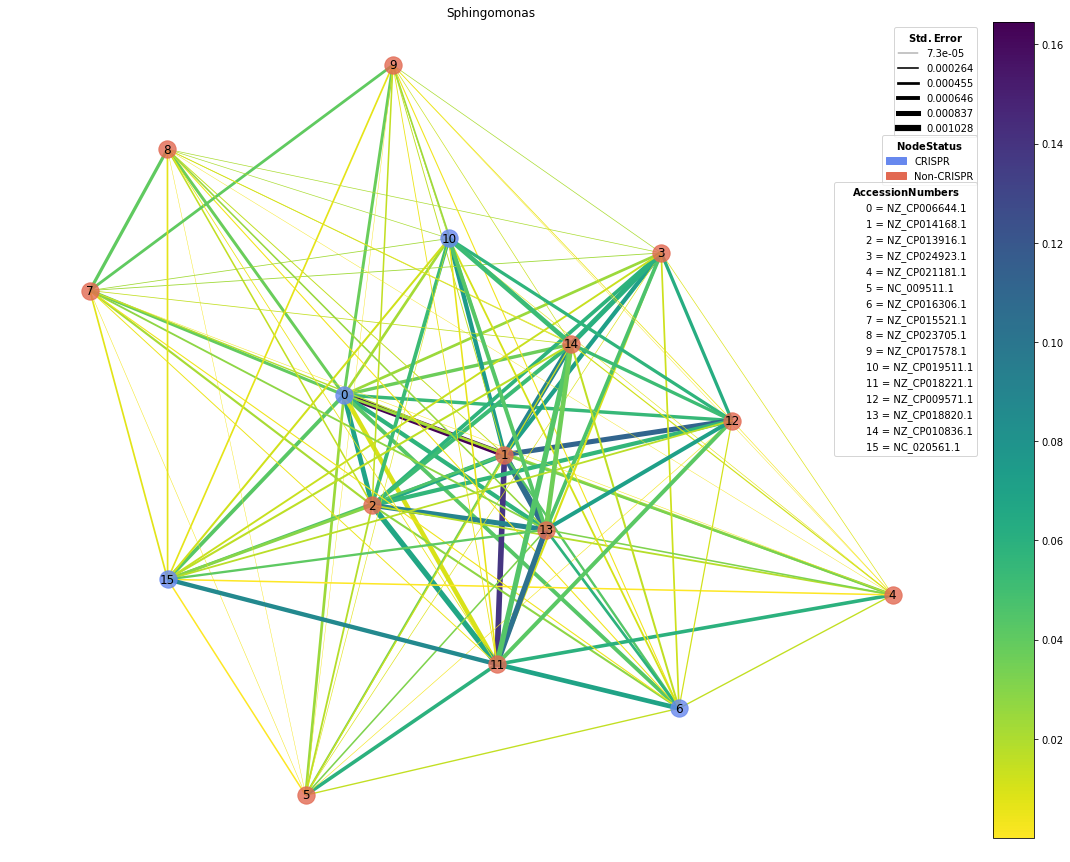

In [4]:
rnetpath = '/home/sidreed/thesis_SidReed/plotnets/Sphingomonas_plot_network.json'
df,net,name = plu.loadnetwork(rnetpath,returnname=True)
plu.plotNetwork(net,df,
              seed=19,
              dpi=dpi,
              name=name,
              ccol=pal[0],
              nccol=pal[-1],
              save='{}/network.png'.format(basefigdir),
              layout=nx.spring_layout,
              width_scaling=6000)

In [5]:
andf = pd.DataFrame(json.load(open('../data/fasta_crispr_annotation_df.json')))
mmdf = plu.loadMarkoOnly(andf)
mmdf.shape

(115, 8)

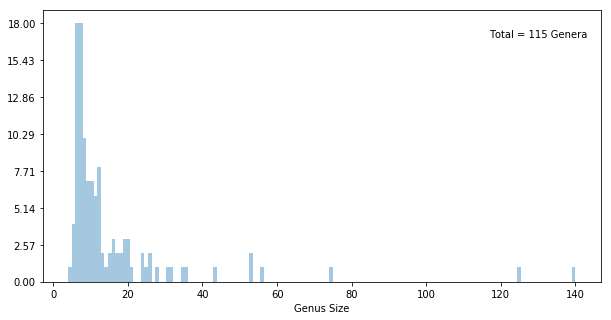

In [6]:
plu.genusSizeDist(mmdf,dpi=dpi,
    file='{}/genus_size_dist.png'.format(basefigdir))

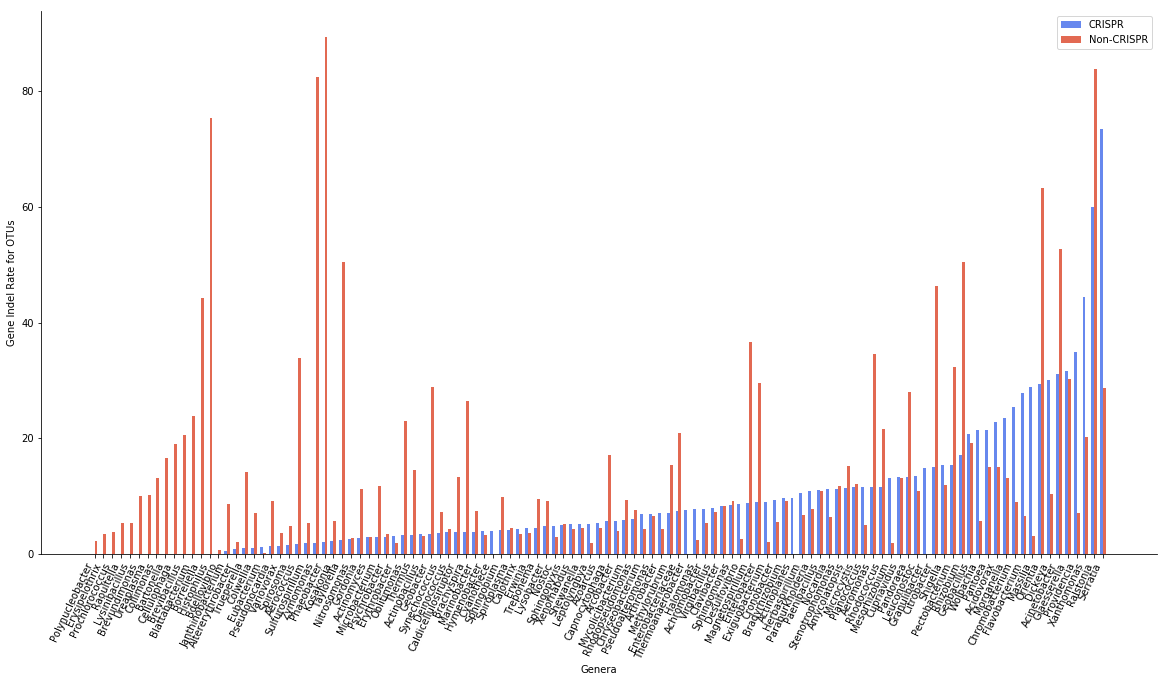

In [16]:
plu.multiBarPlot(mmdf,['c_indel','nc_indel']
            ,'Gene Indel Rate for OTUs',width=1,dpi=dpi,
            file='{}/c_nc_indel_bar.png'.format(basefigdir))

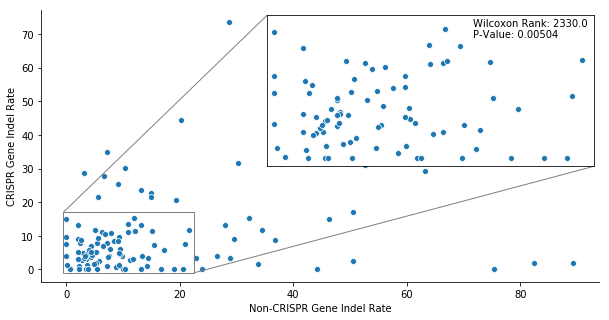

In [8]:
plu.cVsncRate(mmdf,dpi=dpi,
        file='{}/c_nc_rate_scatter.png'.format(basefigdir))

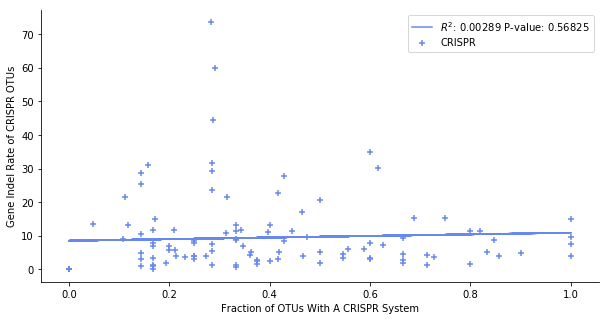

In [12]:
plu.cratevscfrac(mmdf,dpi=dpi,
    file='{}/crate_cfrac_scatter.png'.format(basefigdir))

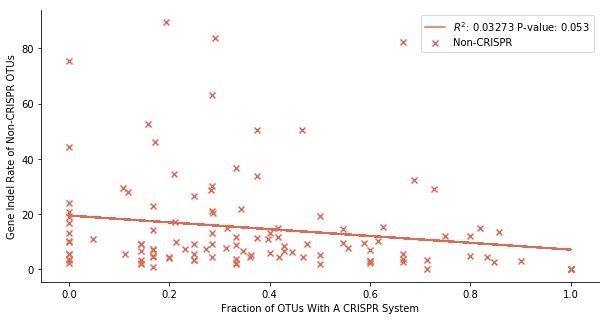

In [14]:
plu.ncratevscfrac(mmdf,dpi=dpi,
    file='{}/ncrate_cfrac_scatter.png'.format(basefigdir))

In [60]:
mdf,stats = plu.loadReports()
finaldf = plu.finaldf(mdf,stats).drop('Streptomyces')
nohdf = finaldf[(finaldf['c_indel'] != 100) & (finaldf['nc_indel'] != 100)]

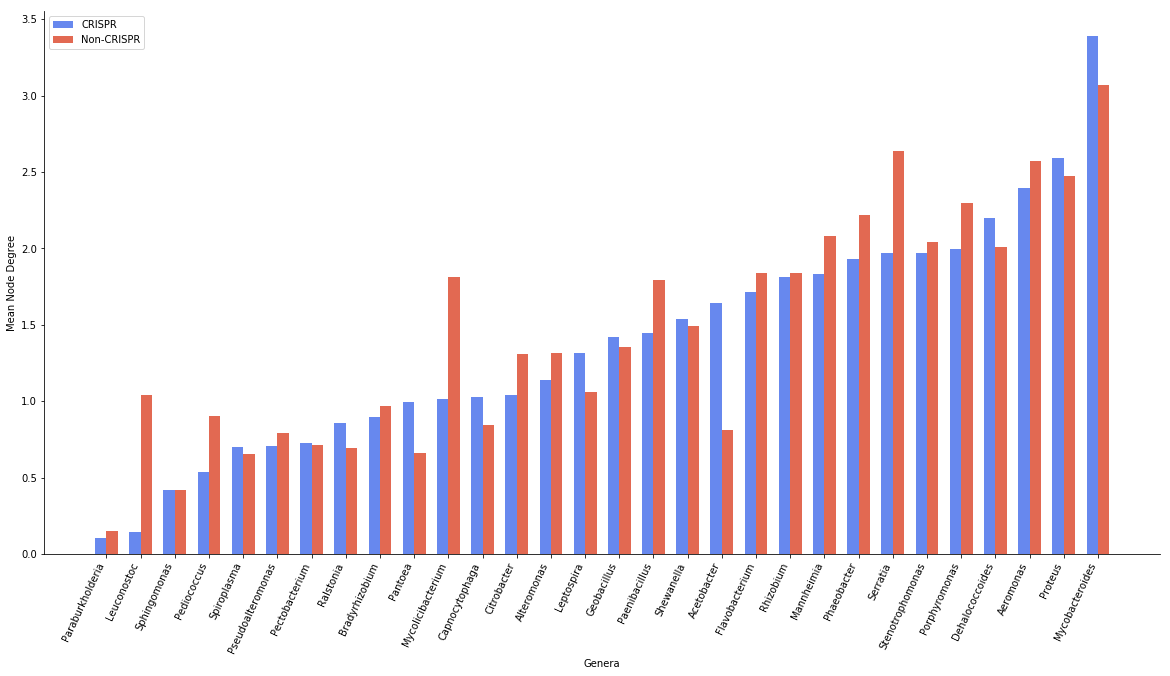

In [61]:
plu.multiBarPlot(nohdf,['c_mean_deg','nc_mean_deg'],
                 'Mean Node Degree',width=1,dpi=dpi,
                file='{}/c_nc_deg_bar.png'.format(basefigdir))

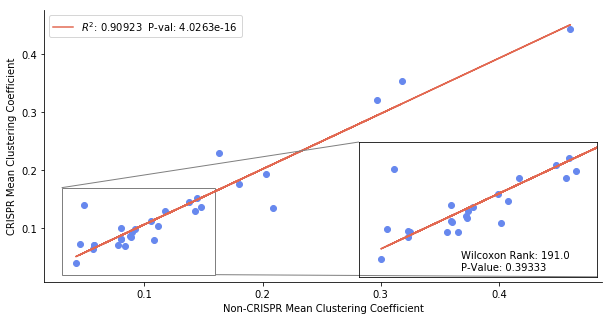

In [62]:
plu.cVsncClust(nohdf,dpi=dpi,
    file='{}/c_nc_clust_scatter.png'.format(basefigdir))

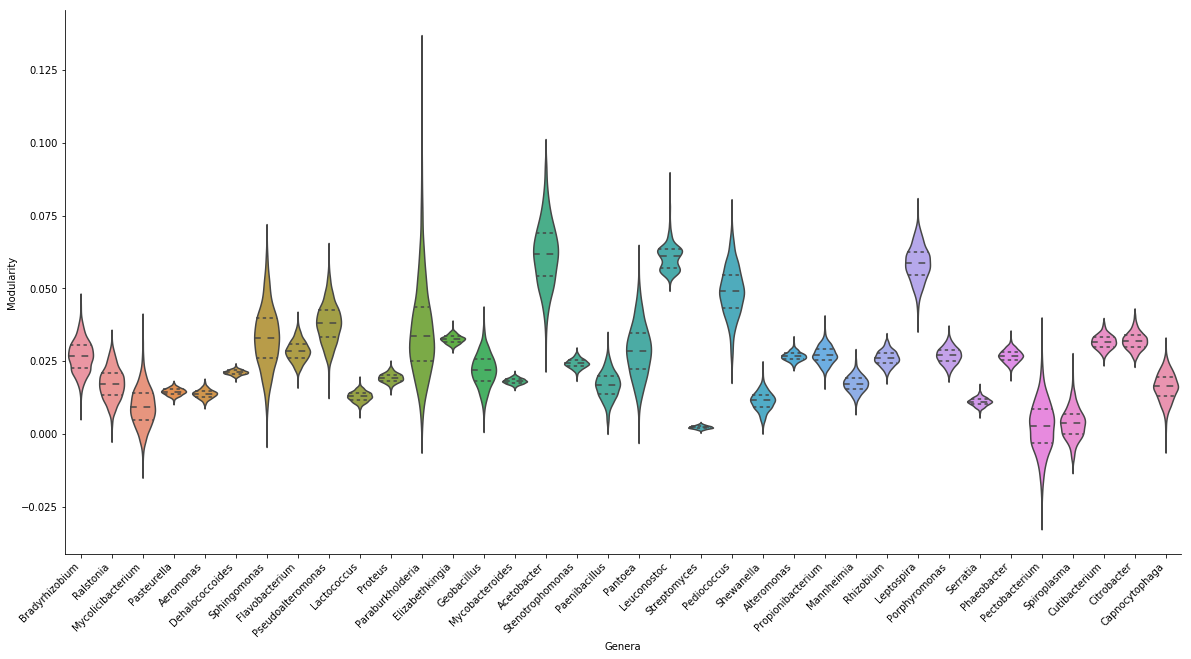

In [63]:
plu.violinPlot(stats,col='modularity',dpi=dpi,
                 file='{}/mod_violin.png'.format(basefigdir))

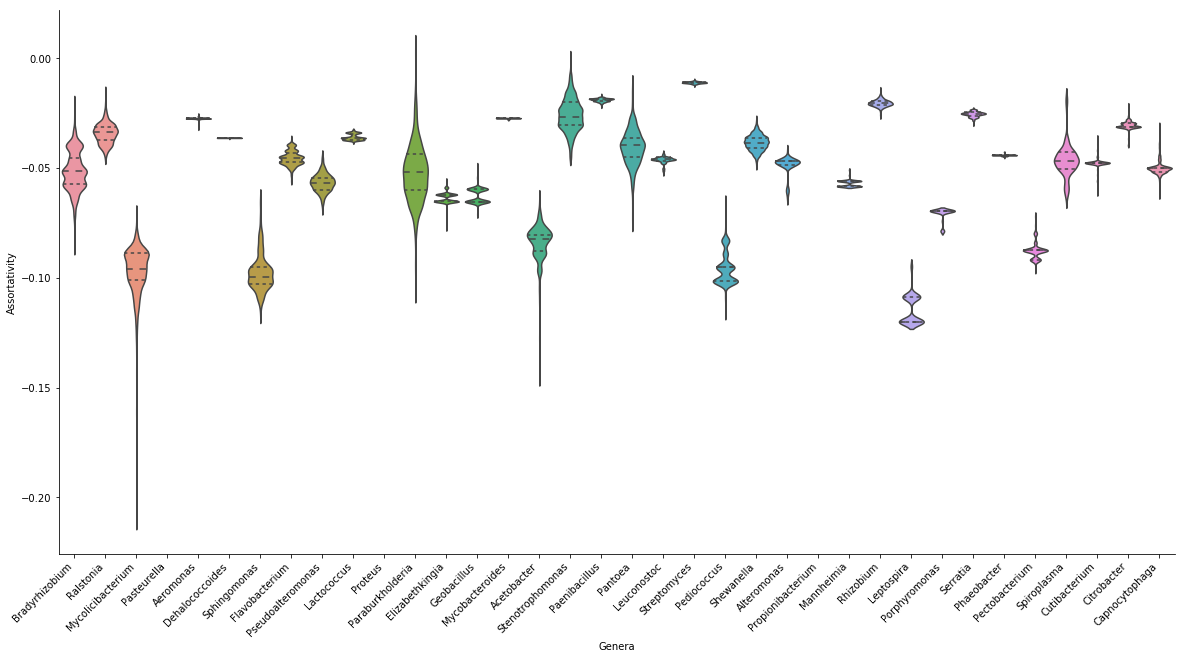

In [64]:
plu.violinPlot(stats,col='assortativity',dpi=dpi,
               file='{}/asst_violin.png'.format(basefigdir))

/home/sidreed/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


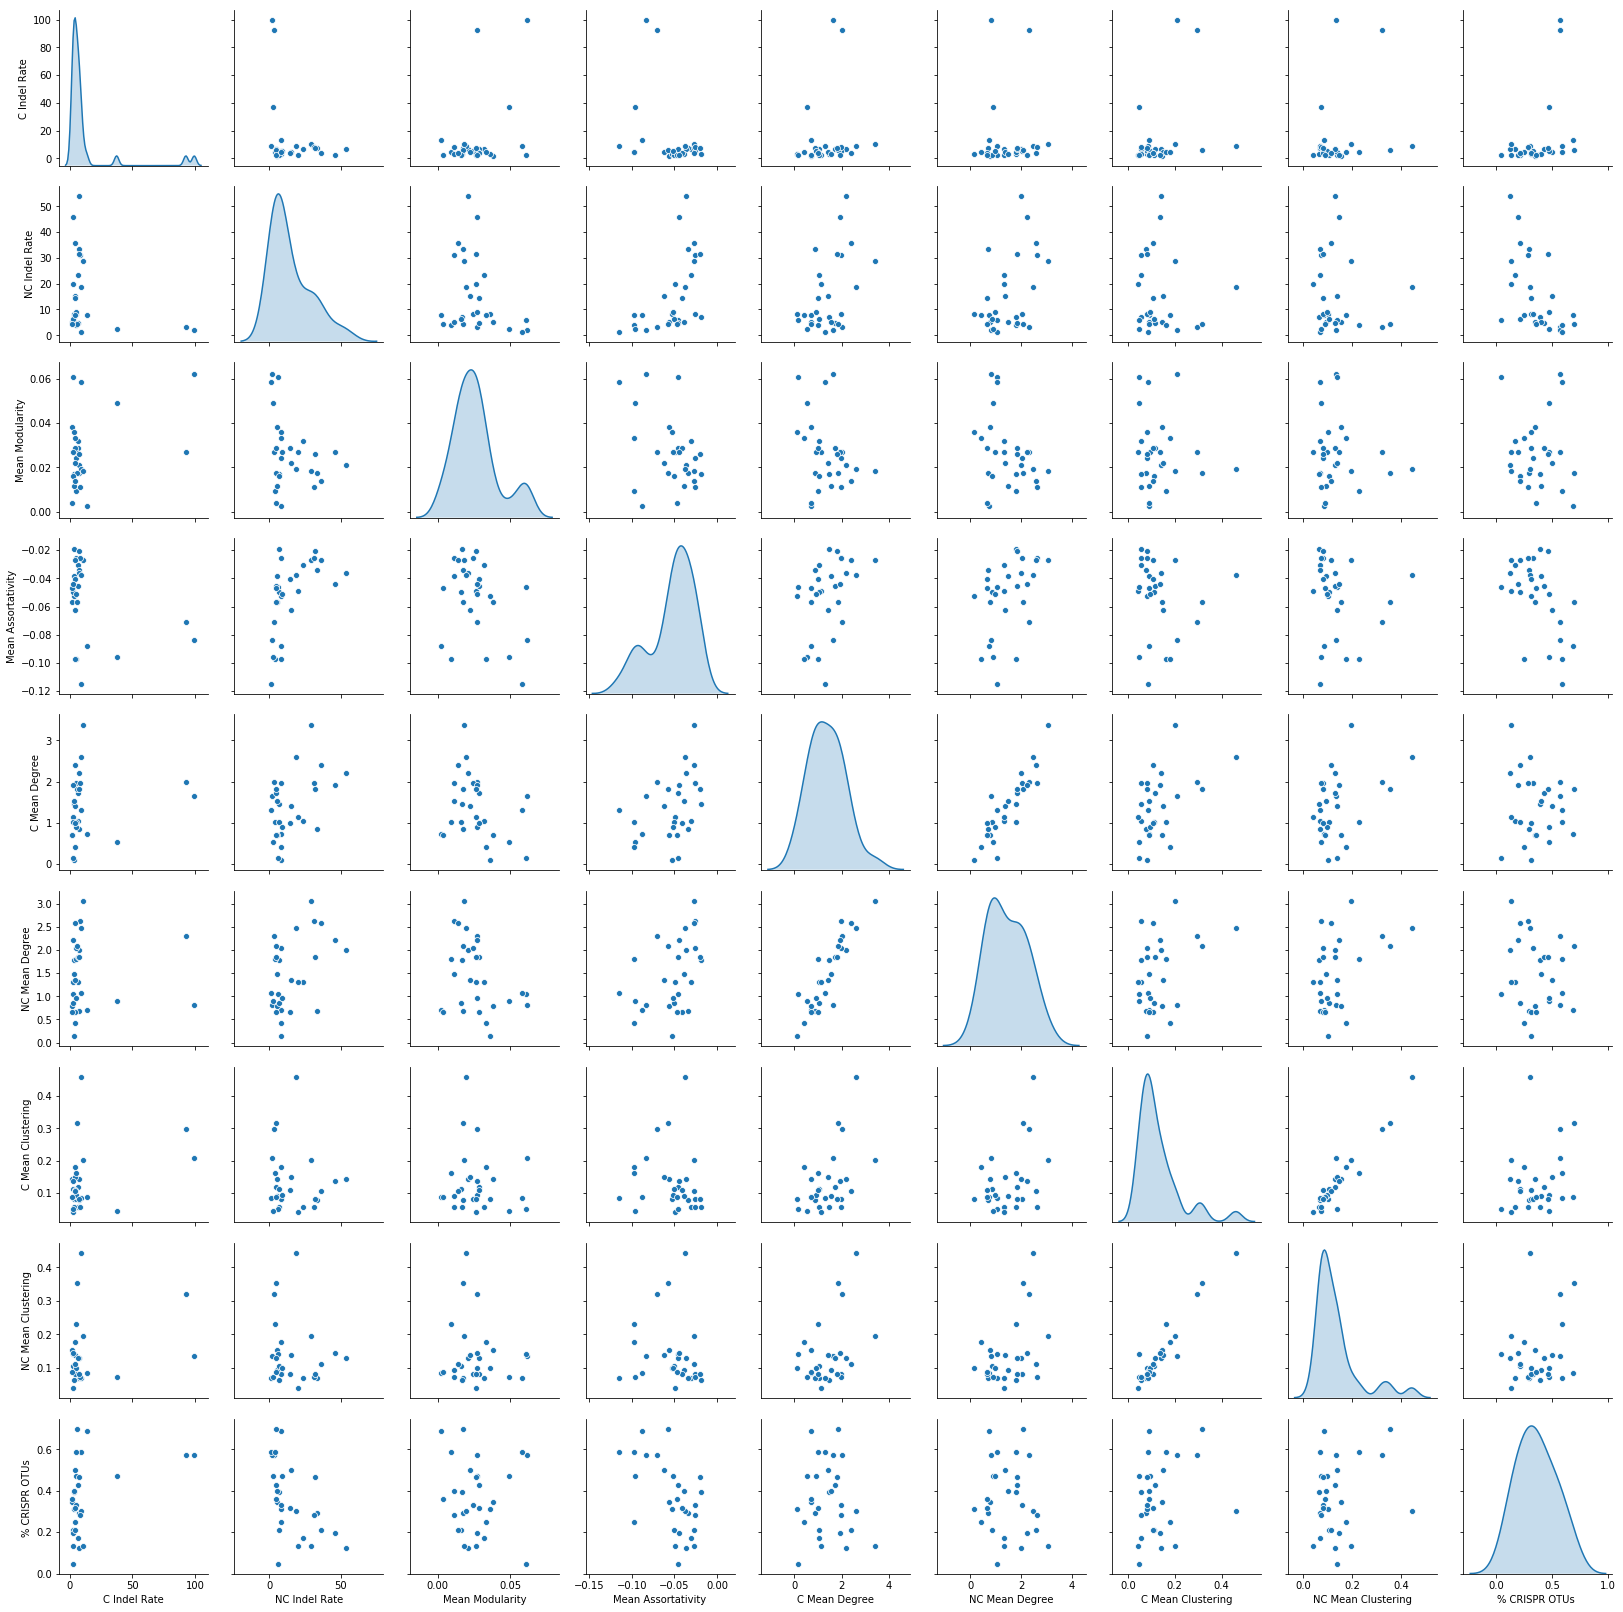

In [65]:
# nohdf.head()
pairdf = nohdf.drop(['c_sem_indel','nc_sem_indel','t_otus','cnc_ratediff'],1)
pairdf.columns = ['C Indel Rate','NC Indel Rate','Mean Modularity',
                  'Mean Assortativity','C Mean Degree','NC Mean Degree',
                  'C Mean Clustering','NC Mean Clustering',
                  '% CRISPR OTUs '
                 ]
pairdf['Genus'] = pairdf.index
g = sns.pairplot(pairdf,diag_kind='kde')
g.savefig('{}/pairplot.png'.format(basefigdir),
        dpi=dpi,format='png',frameon=False)